In [1]:
from sklearn.datasets import make_circles

In [2]:
X,y=make_circles(1000, noise=0.03,random_state=42)

In [3]:
import pandas as pd

In [4]:
circles=pd.DataFrame({"X0": X[:, 0], "X1":X[:,1], "label":y})

In [5]:
import matplotlib.pyplot as plt

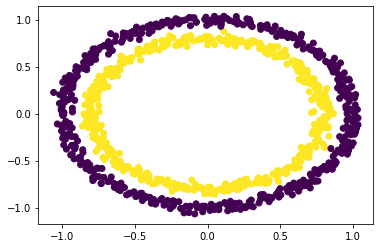

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
import tensorflow as tf

In [8]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history=model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.6979 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.4930
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5150
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5210
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5270
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5480
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.5680
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.5300
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.5450
Epoch 11/

In [9]:
model.evaluate(X,y)

32/32 [==============================] - 1s 5ms/step - loss: 0.0351 - accuracy: 1.0000


[0.03510813042521477, 1.0]

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


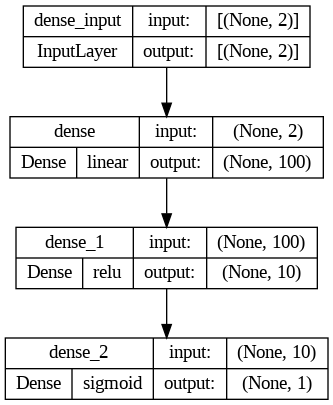

In [11]:
tf.keras.utils.plot_model(model,show_shapes= True, show_layer_names=True, show_layer_activations=True)

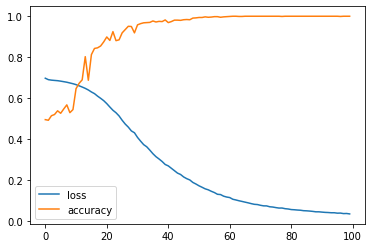

In [12]:
pd.DataFrame(history.history).plot()

32/32 [==============================] - 0s 2ms/step


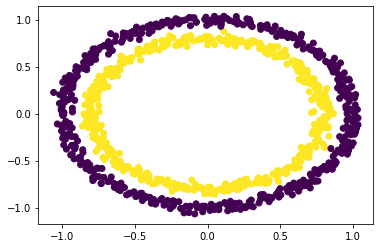

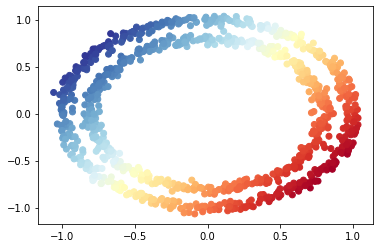

In [40]:
y_pred=model.predict(X)
plt.scatter(X[:,0],X[:,1],c=y)
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y_pred, cmap=plt.cm.RdYlBu)

# To visualize model prediction, lets create funcrtion "plot dicision boundary"
* take trained model faature X and label y
* Create a meahgrid of the different X vaues
* make prediction across the meshgrid
* plot the prediction as well as the line between different zone (Where each unique class falls)

In [17]:
import numpy as np

In [28]:
def plot_decision_boundary(model, X,y):
  """
  plot decision boundary created by model predicting on X"
  this function inspired by two resources:
  https://cs231n.github.io/neural-networks-case-study/
  https://github.com/GokuMohandas/Made-With-ML
  """
  # define axis boundary of plot and and create meshgrid, +0.1 and -0.1 for little margin
  x_min, x_max=X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max=X[:,1].min()-0.1, X[:,1].max()+0.1
  xx, yy=np.meshgrid(np.linspace(x_min, x_max,100), np.linspace(y_min, y_max, 100))

  # create x values(wwe going to make predictions on this)
  x_in=np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # make predictions
  y_pred=model.predict(x_in)
  # check for multi class
  if (len(y_pred[0]))>1:
    print("doing multiclass classification")
    # we have to reshape our predictions to get them ready for plotting
    y_pred=np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)
  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
binary classification


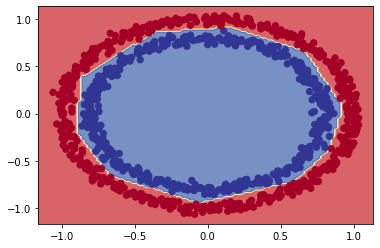

In [29]:
# check the predictions our model is making
plot_decision_boundary(model, X,y)

In [30]:
# borrowed fro cs231n neural network case study
# use activation in classification to introduce non linearity

In [36]:
# why we need to introduce non linearity for non linear data and linearity for linear data
# you cannot classify non linear data with straight line so use activation to introduce non linearity in our data
tf.random.set_seed(42)

model=tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

history=model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 4ms/step - loss: 2.6973 - accuracy: 0.4550
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7065 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6961 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6969 - accuracy: 0.4580
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5200
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6947 - accuracy: 0.5230
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6995 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.4810
Epoch 11/

313/313 [==============================] - 1s 2ms/step
binary classification


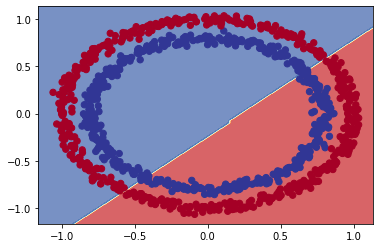

In [32]:
plot_decision_boundary(model, X,y)

In [47]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

history=model_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.7455 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7302 - accuracy: 0.4930
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7211 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7117 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7092 - accuracy: 0.4560
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.4450
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7057 - accuracy: 0.4370
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.4210
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.4040
Epoch 11/

313/313 [==============================] - 1s 3ms/step
binary classification


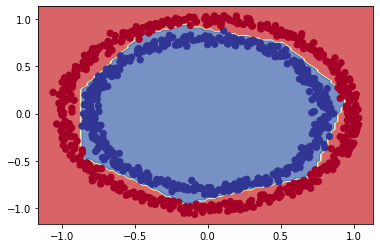

In [46]:
plot_decision_boundary(model_1,X,y)

In [49]:
# evaluate
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.9890


[0.3522435128688812, 0.9890000224113464]

# if i gave you unlimited amount of straight lines(linear) and unlimited amount of non straight lines(non linear lines) you could draw any pattern that you wanted to.

In [50]:
A=tf.cast(tf.range(-10,10), tf.float32)

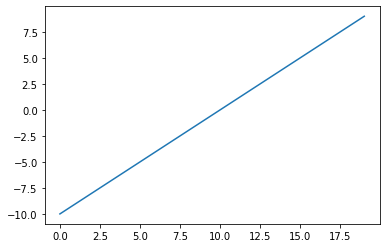

In [52]:
plt.plot(A)

In [58]:
A.numpy()

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)

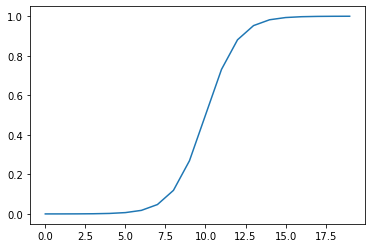

In [60]:
plt.plot(tf.keras.activations.sigmoid(A))

In [61]:
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105123e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

In [62]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [63]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

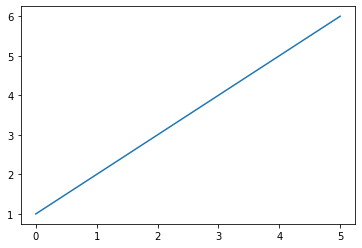

In [64]:
plt.plot([1,2,3,4,5,6])

In [69]:
def relu(x):
  return tf.maximum(0,x)

In [70]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [71]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [72]:
tf.maximum(A,0)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

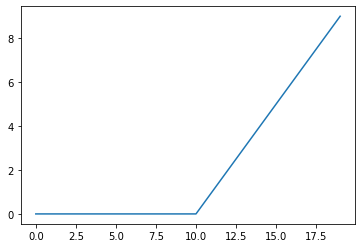

In [73]:
plt.plot(relu(A))

In [75]:
tf.keras.activations.linear(A)==A

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# neural network uses combinations of linear and non linear activation function to find pattern in data
https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

# Evaluating and improving our activation function

In [85]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [89]:

# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 5ms/step - loss: 0.6926 - accuracy: 0.4925
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.4888
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.4988
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.4988
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5475
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5113
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5450
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5950
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6513
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.6087
Epoch 11/

313/313 [==============================] - 1s 2ms/step
binary classification
313/313 [==============================] - 1s 2ms/step
binary classification


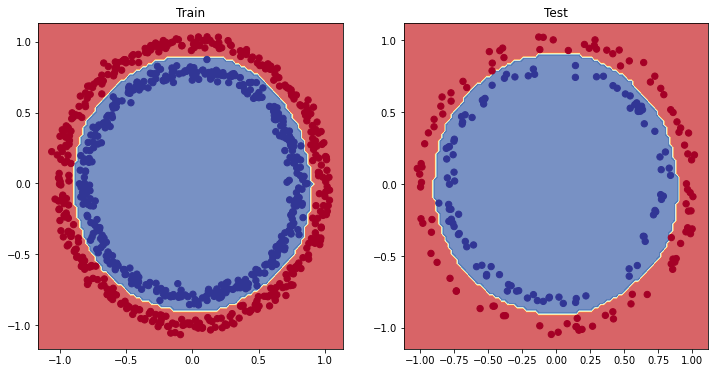

In [90]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

Text(0.5, 1.0, 'model loss curve')

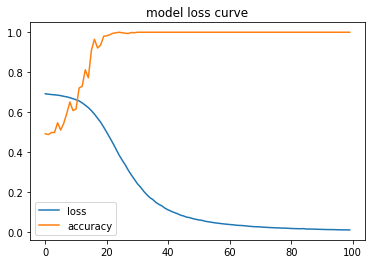

In [95]:
# plot the loss(training) curves
pd.DataFrame(history.history).plot()
plt.title("model loss curve")

In [96]:
# loss going means prediction is going closer to ground truth
# generalization means model do well on unseen data


# make ideal learning rate(finding best learning rate whre loss decreases the most during training)
how to visualize loss decreasing and potentially decrease the learning rate during training, we use following steps:
* A learning rate **callback**-extra functionality you add to your model while it is training so, it has to exist before traininf ie fit
* modified loss curve Plot(loss vs learning rate to find learning rate value the loss decreases the most).   
learning rate callback to start at certain learning rate and gradually decrease/increase that learning rate during training in each epochs
- there are many diferent callback but we hear using learning rate callback



In [98]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])
# you can pass multiple callbacks in list of callbacks in fit function for different callback operation 

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.7127 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7119 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.4900 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.4863 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

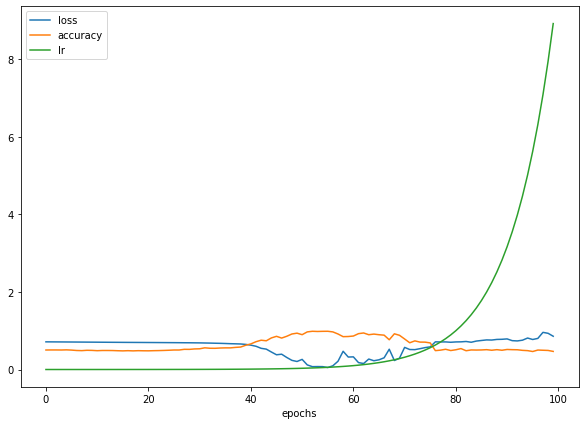

In [101]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");
# we want learning rate where loss decreases the fastest which is in may be 45 epochs in the curve below

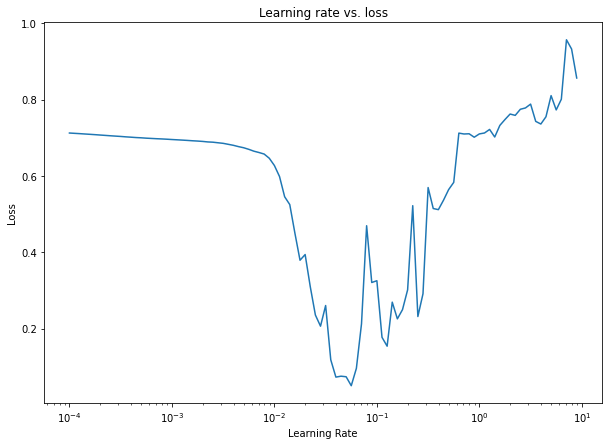

In [106]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))# here we replicated learning rate we passed to  learning rate scheduler
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");
# from graph find learning rate where loss decreases the most or fastest maybe between 10^-2 1nd 10^-1
# find the learning rate where loss still decreasing and not quit flatten out

     

In [115]:

# Example of other typical learning rate values
10**-1, 10**-2, 10**-3, 1e-4
# default learning rate works good 99 % time
# from above graph lets choose ideal learning rate 0.02 ie slightly greater than 10^-2 where loss is sharply decreasing and still not flatten out.
# use this to retrain your model and look how it performs

(0.1, 0.01, 0.001, 0.0001)

In [116]:

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)
# model 10 has performed better than model 8 with 0.01 learning rate with less epochs because it updating with larger steps

Epoch 1/20
25/25 [==============================] - 2s 4ms/step - loss: 0.6891 - accuracy: 0.5113
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.5113
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5113
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5150
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5188
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5250
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.5238
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5288
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5312
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5337
Epoch 11/20
25/25 [

In [118]:

# # Plot the decision boundaries for the training and test sets
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Train")
# plot_decision_boundary(model_10, X=X_train, y=y_train)
# plt.subplot(1, 2, 2)
# plt.title("Test")
# plot_decision_boundary(model_10, X=X_test, y=y_test)
# plt.show()
     

# more classification evaluation method other than visualization model results
accuracy, precision, recall, f1_score, confucion metrics, classification report(sklearn)

In [119]:

# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")
     

7/7 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.4750
Model loss on test set: 0.681121289730072
Model accuracy on test set: 47.50%


In [142]:

# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, (y_preds.squeeze()>0.5).astype(np.int32))

7/7 [==============================] - 0s 2ms/step


array([[58, 43],
       [62, 37]])

In [146]:

# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[58, 43],
       [62, 37]])

In [141]:
len(y_test)

200

In [147]:
from sklearn.metrics import ConfusionMatrixDisplay

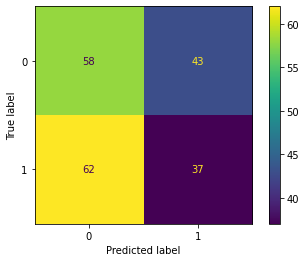

In [157]:
ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_preds),include_values=True, colorbar= True)

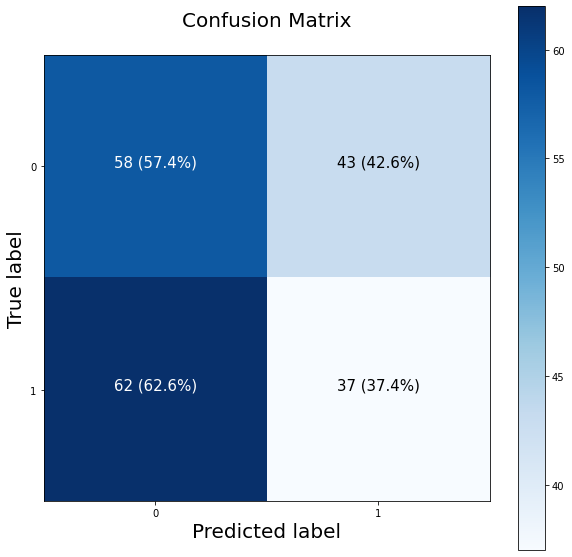

In [155]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# multiclass classification

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:

# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:

# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

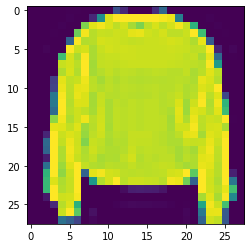

In [7]:

# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [8]:
# Check our samples label
train_labels[7]

2

In [9]:
# It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

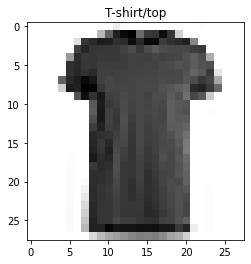

In [10]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

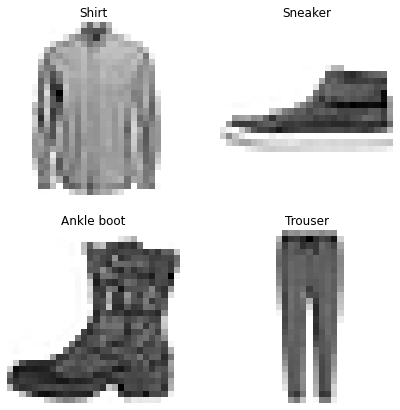

In [11]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The input shape will have to deal with 28x28 tensors (the height and width of our images).
* We're actually going to squash the input into a tensor (vector) of shape (784)
* The output shape will have to be 10 because we need our model to predict for 10 different classes.
* We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
* More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [12]:
train_data[0].shape

(28, 28)

In [13]:
len(class_names)

10

In [14]:
tf.random.set_seed(42)
model_10=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="Adam", metrics=["accuracy"])

non_norm_history =model_10.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 2.3119 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3031 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [15]:
# what flatten layer do?
# our data need to be flatten from 28 by 28 to none by 784
# if you have shape error then flatten data to one long vector(caviat some layers can flatten your data automatically). pass flatten data to other layers
flatten_layer=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_layer.output_shape
# neural network likes every thing to be in one long vector

(None, 784)

In [16]:
# or use this code with categorical cross entropy by one hot encodinf labels
tf.random.set_seed(42)
model_10=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer="Adam", metrics=["accuracy"])

non_norm_history =model_10.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3564 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [17]:
tf.one_hot(train_labels,depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [18]:
model_10.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [19]:
# preprocess(scale/normalize)
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6400 - accuracy: 0.3765 - val_loss: 1.3194 - val_accuracy: 0.4904
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2092 - accuracy: 0.5190 - val_loss: 1.1651 - val_accuracy: 0.5333
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0897 - accuracy: 0.5570 - val_loss: 1.0715 - val_accuracy: 0.5671
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9699 - accuracy: 0.6153 - val_loss: 0.9322 - val_accuracy: 0.6451
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8730 - accuracy: 0.6579 - val_loss: 0.8781 - val_accuracy: 0.6598
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8339 - accuracy: 0.6791 - val_loss: 0.8560 - val_accuracy: 0.6851
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8071 - accuracy: 0.7128 - val_loss: 0.8135 - val_accurac

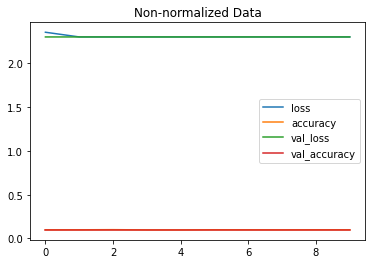

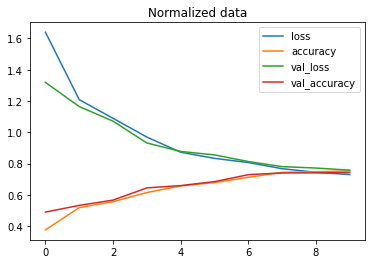

In [21]:
# Woah, we used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value! it increase performance low epochs needed

import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");


🔑 Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

# Finding ideal learning rate

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8371 - accuracy: 0.2361 - val_loss: 1.6325 - val_accuracy: 0.3415 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4474 - accuracy: 0.3996 - val_loss: 1.2851 - val_accuracy: 0.4547 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2391 - accuracy: 0.4642 - val_loss: 1.2149 - val_accuracy: 0.4714 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1489 - accuracy: 0.5168 - val_loss: 1.0309 - val_accuracy: 0.5767 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9385 - accuracy: 0.6307 - val_loss: 0.9007 - val_accuracy: 0.6672 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8022 - accuracy: 0.6866 - val_loss: 0.7692 - val_accuracy: 0.6965 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

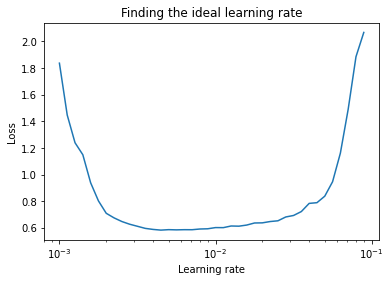

In [23]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [24]:
# Set random seed
# refit with ideal learning rate
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.0427 - accuracy: 0.6554 - val_loss: 0.7034 - val_accuracy: 0.7590
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6192 - accuracy: 0.7893 - val_loss: 0.6117 - val_accuracy: 0.7903
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5594 - accuracy: 0.8076 - val_loss: 0.5906 - val_accuracy: 0.7942
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5390 - accuracy: 0.8145 - val_loss: 0.5585 - val_accuracy: 0.8090
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5269 - accuracy: 0.8180 - val_loss: 0.5662 - val_accuracy: 0.8042
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5180 - accuracy: 0.8212 - val_loss: 0.5624 - val_accuracy: 0.8040
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5121 - accuracy: 0.8237 - val_loss: 0.5497 - val_accuracy:

# Evaluate our model(confusion matrix code)

In [26]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [27]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]
     

313/313 [==============================] - 1s 3ms/step


array([[2.4979676e-07, 4.6582560e-10, 6.5793498e-10, 9.8632838e-05,
        1.4196314e-06, 1.9348730e-01, 3.6581766e-06, 8.3596520e-02,
        1.5451749e-02, 7.0736051e-01],
       [9.1442623e-04, 1.3474128e-06, 8.1840861e-01, 9.2747423e-06,
        6.1678268e-02, 2.9199460e-35, 1.1898761e-01, 6.2414119e-32,
        3.8501369e-07, 1.4209086e-28],
       [6.1461606e-06, 9.9861372e-01, 1.1280584e-04, 6.2601187e-04,
        6.3884328e-04, 2.4291323e-27, 2.5021936e-06, 5.7521158e-20,
        4.8967727e-12, 5.6998573e-16],
       [7.9636315e-09, 9.9982232e-01, 6.3602549e-08, 1.5483423e-04,
        2.2807708e-05, 4.2241103e-23, 3.8730672e-09, 2.4254058e-16,
        1.5736841e-13, 1.9454426e-10],
       [1.3188675e-01, 1.8876136e-04, 2.2704418e-01, 1.4497319e-02,
        7.5462267e-02, 8.0151547e-19, 5.4993945e-01, 1.7043165e-15,
        9.8129816e-04, 2.9339296e-15]], dtype=float32)

In [35]:

# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()], tf.argmax(y_probs[0])

(9, 'Ankle boot', <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [36]:
y_pred=y_probs.argmax(axis=1)
y_pred[:12]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5])

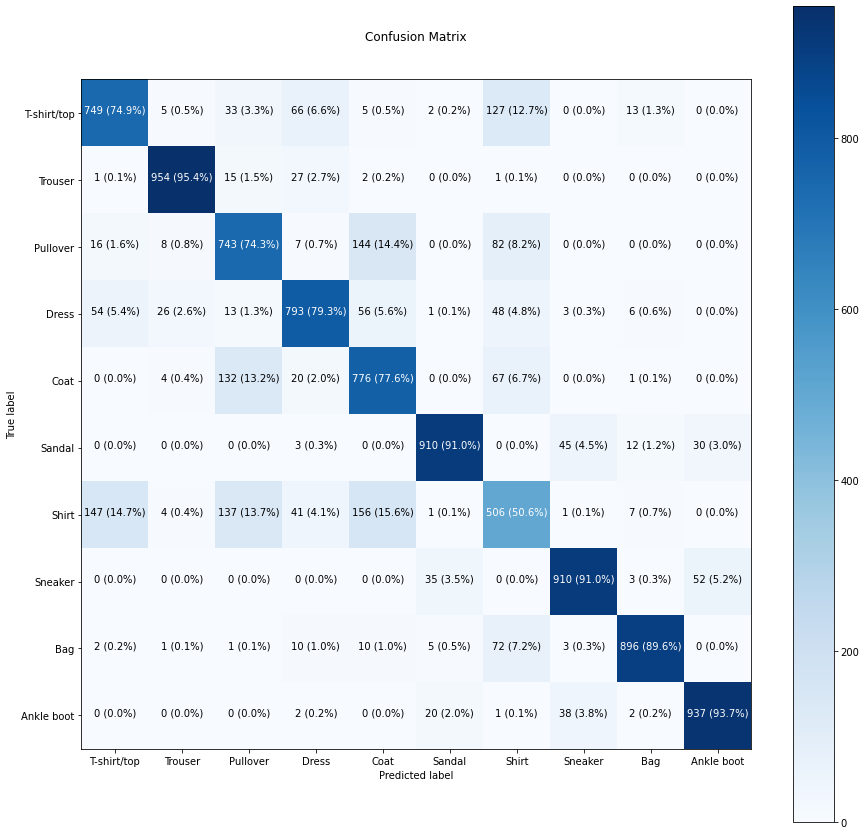

In [43]:
make_confusion_matrix(test_labels, y_pred, figsize=(15,15), classes=class_names, text_size=10)

Let's create a function to plot a random image along with its prediction.

In [46]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
     

1/1 [==============================] - 0s 20ms/step


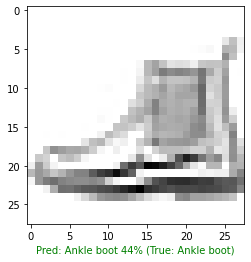

In [49]:

# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

What patterns is our model learning?


In [50]:

# Find the layers of our most recent model
model_14.layers

In [51]:

# Extract a particular layer
model_14.layers[1]

In [52]:
# The get_weights() method returns the weights (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.28352582,  0.46823892, -0.16408457, -0.01950219],
        [-0.36175776,  1.1265291 , -0.5452119 ,  0.33653897],
        [-0.9738877 ,  0.17877275,  0.20274305,  0.57828975],
        ...,
        [-0.37727422,  0.07710151, -0.5236875 ,  0.29935545],
        [ 0.4991768 ,  0.41107765, -0.980104  ,  0.5684999 ],
        [-0.10804676,  0.53181547, -0.33870602,  0.3451125 ]],
       dtype=float32), (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the kernel_initializer parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.

In [53]:

# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 0.28217113,  0.49288312,  0.6145897 , -0.18333384], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [54]:
# Can now calculate the number of paramters in our model
model_14.summary()
     

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to every layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility plot_model().

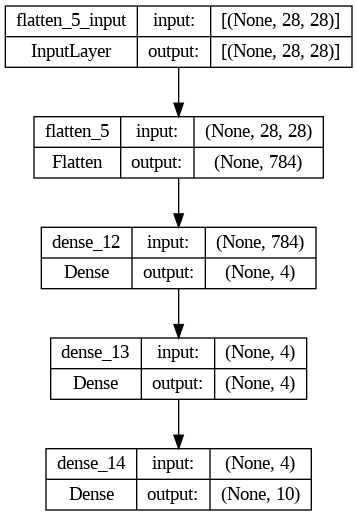

In [55]:

from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)